> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
> **TMDB Movie Data** This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including
    ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj']


### Question(s) for Analysis
- Do most-revenue-generated movies always require huge budget?
- What are the top genres making revenue?
- What are the top genres have high votes?
- Dp famous actors always bring huge revenue?
- What are the top all time movies making revenue? Are they well-known?

In [51]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [52]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")

In [53]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [54]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [ ]:
# have a few NaNs in keywords and production_compaines which not a big deal


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [43]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#### Let's choose the features/variables I am interested in

In [56]:
features = ["id", "budget", "revenue", "original_title", "cast", "director", "keywords", "runtime", "genres", "production_companies", "release_date", "release_year", "vote_count", "vote_average"]

df = df[features]

## Cleaning 1: Convert release_date to datetime

In [57]:
df["release_date"] = pd.to_datetime(df["release_date"])
df.dtypes

id                               int64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
vote_count                       int64
vote_average                   float64
dtype: object

## Cleaning 2: Let's look at revenue & budget values

In [58]:
df.describe()

,id,budget,revenue,runtime,release_year,vote_count,vote_average
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,1.462570e+07,3.982332e+07,102.070863,2001.322658,217.389748,5.974922
std,92130.136561,3.091321e+07,1.170035e+08,31.381405,12.812941,575.619058,0.935142
min,5.000000,0.000000e+00,0.000000e+00,0.000000,1960.000000,10.000000,1.500000
25%,10596.250000,0.000000e+00,0.000000e+00,90.000000,1995.000000,17.000000,5.400000
50%,20669.000000,0.000000e+00,0.000000e+00,99.000000,2006.000000,38.000000,6.000000
75%,75610.000000,1.500000e+07,2.400000e+07,111.000000,2011.000000,145.750000,6.600000
max,417859.000000,4.250000e+08,2.781506e+09,900.000000,2015.000000,9767.000000,9.200000


#### 50% of the movies have 0 budget! let's remove these rows

In [59]:
df[df["budget"] == 0].shape

(5696, 14)

In [60]:
df = df[df["budget"] > 0]
df.shape

(5170, 14)

In [61]:
df.describe()

,id,budget,revenue,runtime,release_year,vote_count,vote_average
count,5170.000000,5.170000e+03,5.170000e+03,5170.000000,5170.000000,5170.000000,5170.000000
mean,45513.083366,3.073943e+07,8.027566e+07,107.093230,2001.252805,408.593424,6.032108
std,72723.324150,3.890065e+07,1.594749e+08,22.808798,11.775932,788.249398,0.884156
min,5.000000,1.000000e+00,0.000000e+00,0.000000,1960.000000,10.000000,1.500000
25%,8840.500000,6.000000e+06,0.000000e+00,93.000000,1996.000000,35.250000,5.500000
50%,13010.000000,1.700000e+07,2.100078e+07,103.000000,2005.000000,122.000000,6.100000
75%,44935.250000,4.000000e+07,8.942473e+07,117.000000,2010.000000,402.000000,6.600000
max,417859.000000,4.250000e+08,2.781506e+09,540.000000,2015.000000,9767.000000,8.400000


## Cleaning 3: Convert cast & genres to understandable and easy to analyze form

### I will follow some steps to get the targeted shape
- Split columns by "|"
- add the splitted columns to the dataframe
- Unpivot the data we want

In [13]:
# clean up the genres column
# the target is something like
# original_tile|revenue|budget|genres
# XXXXX        | 12121|1212212|Action
#XXXXX        | 12121|1212212|Sci-Fi
# I got help from https://www.youtube.com/watch?v=E-q24gS8cqg&t=2672s

In [62]:
df_genres = pd.concat([df, df["genres"].str.split("|", expand=True)],axis=1)
df_genres = df_genres.melt(id_vars = ["id", "original_title","budget", "revenue", "vote_average"], value_vars=list(range(5)))
df_genres = df_genres[df_genres["value"].notna()]

#### We'll do the same process on "cast" variable

In [63]:
df_cast = pd.concat([df, df["cast"].str.split("|", expand=True)], axis=1)
df_cast_revenue = df_cast.melt(id_vars = ["id", "original_title","budget","revenue"], value_vars=list(range(5)))
df_cast_revenue = df_cast_revenue[df_cast_revenue["value"].notna()]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Do most-revenue-generated movies always require huge budget?)

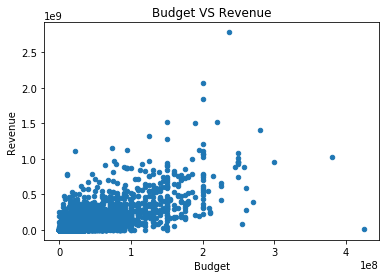

In [64]:
df.plot(x="budget", y="revenue", kind="scatter")
plt.title("Budget VS Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

- I can't really sure that the more budget means alwauys more revenue
- We have some outliers like around 400 million spent just for 11 million :)
- Really interesting that some movies haven't made any revenue. It could be an error?!

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

### Research Question 2  (What are the top genres making revenue?)

I will plot bars more than once so it's better to have a function doing that

In [65]:
def plot_bar(df,x,y,title,xlabel,ylabel):
    df.plot(x=x, y=y, kind="bar")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

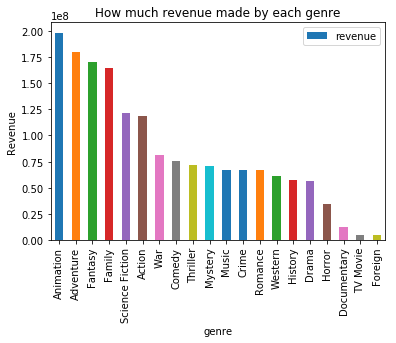

In [66]:
df_genres_revenue = df_genres.groupby("value")["revenue"].mean()
df_genres_revenue = df_genres_revenue.reset_index()
df_genres_revenue = df_genres_revenue.sort_values("revenue",ascending=False)
plot_bar(df_genres_revenue,"value", "revenue", "How much revenue made by each genre", "genre", "Revenue")

- Truely interesting that the animation movies make such revenue
- No wonder that adventure, fantasy, and sci-fi are in the head

### Research Question 3  (What are the top genres have high votes?)

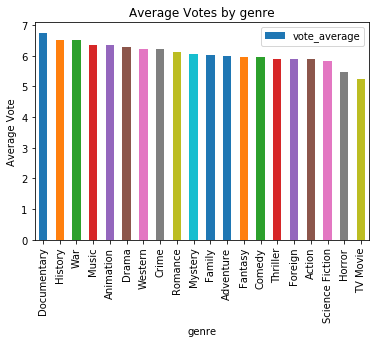

In [67]:
df_genres_votes = df_genres.groupby("value")["vote_average"].mean()
df_genres_votes = df_genres_votes.reset_index()
df_genres_votes = df_genres_votes.sort_values("vote_average",ascending=False)
plot_bar(df_genres_votes,"value", "vote_average", "Average Votes by genre", "genre", "Average Vote")

- OMG Documentaries are the most voted one although they don't make any revenue compared to other genres.
- But wait that couldn't be true cause the average is depends on number of observations
- So lets see how many "adventure" & "Documentry"

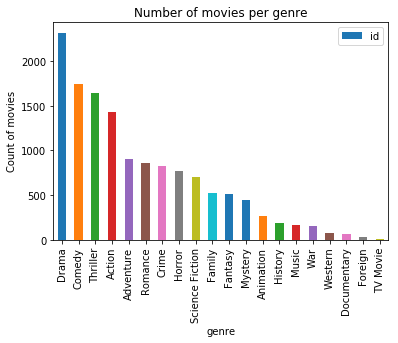

In [68]:
df_genres_count = df_genres.groupby("value").count()
df_genres_count = df_genres_count.reset_index()
df_genres_count = df_genres_count.sort_values("id",ascending=False)
plot_bar(df_genres_count,"value", "id", "Number of movies per genre", "genre", "Count of movies")


#### As we can see has less movies

### Research Question 4  (Do famous actors always bring huge revenue?)

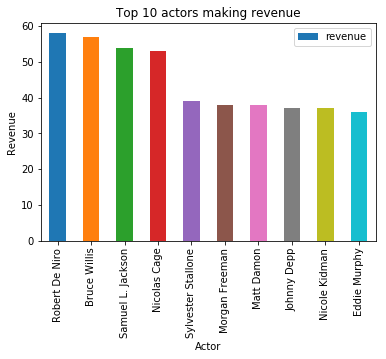

In [69]:
df_cast_revenue = df_cast_revenue.groupby("value")["revenue"].count()
df_cast_revenue = df_cast_revenue.reset_index()
df_cast_revenue = df_cast_revenue.sort_values("revenue",ascending=False)
plot_bar(df_cast_revenue.head(10),"value", "revenue", "Top 10 actors making revenue", "Actor", "Revenue")

- All of them are super stars
- It's interesting that most of them are men

In [23]:
# I am curios knowing what movies got the biggest revenue

### Research Question 5  (What are the top all time movies making revenue? Are they well-known?)

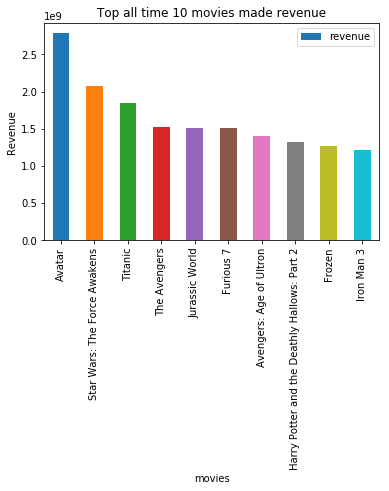

In [70]:
df_revenue = df.sort_values("revenue",ascending=False)
plot_bar(df_revenue.head(10),"original_title", "revenue", "Top all time 10 movies made revenue", "movies", "Revenue")


#### No wonder, all of them are so famous

<a id='conclusions'></a>
## Conclusions

- It's not clear enough that huge revenue always mean huge budget
- Always investing in famous actors & directors bring much money
- Don't let votes trick you, take care of how many observations we have and whether we have outliers
- I wish I could dive deep into what season in the year bring much money (does it really matter?)


### Limitations
- I got one limitation that the dataset doesn't have platform movies like Netflix which could help us understand if those platforms hurt the industry and other traditional producers

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0